In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
 
A = cv2.imread("D:\REAL\REAL.jpg")
P = cv2.imread("D:\REAL\REAL.jpg")

In [2]:
a = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
p = cv2.cvtColor(P, cv2.COLOR_BGR2GRAY)

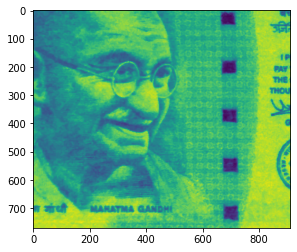

In [3]:
a2tr = a[330:1200, 1016:1927]
plt.imshow(a2tr)

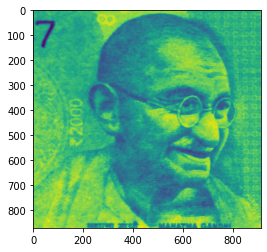

In [4]:
b2tr = p[170:1040, 716:1627]
plt.imshow(b2tr)

(1100, 3000)


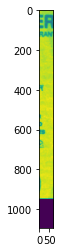

In [5]:
print(a.shape)
a2_str = a[5:1100, 2080:2151]
plt.imshow(a2_str)

(1100, 3000)


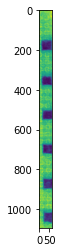

In [6]:
print(p.shape)
p2_str = p[5:1100, 1666:1729]
plt.imshow(p2_str)

In [7]:
hsvImageReal = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)
hsvImageFake = cv2.cvtColor(P, cv2.COLOR_BGR2HSV)

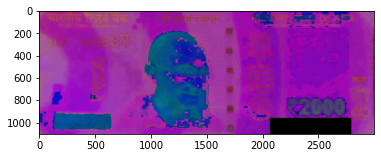

In [8]:
plt.imshow(hsvImageReal)

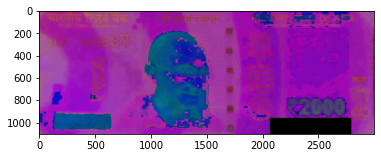

In [9]:
plt.imshow(hsvImageFake)

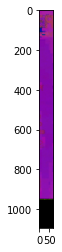

In [10]:
croppedImageReal = hsvImageReal[5:1100, 2080:2151]
plt.imshow(croppedImageReal)

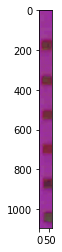

In [11]:
croppedImageFake = hsvImageFake[5:1100, 1666:1729]
plt.imshow(croppedImageFake)

In [12]:
satThresh = 0.3
valThresh = 0.9
g = croppedImageReal[:,:,1]>satThresh
h = croppedImageReal[:,:,2] < valThresh

g1 = croppedImageFake[:,:,1]>satThresh
h1 = croppedImageFake[:,:,2] < valThresh

In [13]:
BWImageReal = g&h
BWImageFake = g1&h1

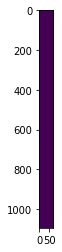

In [14]:
plt.imshow(BWImageReal)

In [15]:
    def bwareaopen(img, min_size, connectivity=8):
       
        # Find all connected components (called here "labels")
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
            img, connectivity=connectivity)
        
        # check size of all connected components (area in pixels)
        for i in range(num_labels):
            label_size = stats[i, cv2.CC_STAT_AREA]
            
            # remove connected components smaller than min_size
            if label_size < min_size:
                img[labels == i] = 0
                
        return img

In [16]:

binr = cv2.threshold(a2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
 
# define the kernel
kernel = np.ones((3, 3), np.uint8)
 
# invert the image
invert = cv2.bitwise_not(binr)
 
# use morph gradient
BWImageCloseReal = cv2.morphologyEx(invert,
                                  cv2.MORPH_GRADIENT,
                                  kernel)

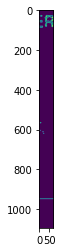

In [17]:
plt.imshow(BWImageCloseReal)

In [18]:
binr2 = cv2.threshold(p2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
 
# define the kernel
kernel2 = np.ones((3, 3), np.uint8)
 
# invert the image
invert2 = cv2.bitwise_not(binr2)
 
# use morph gradient
BWImageCloseFake = cv2.morphologyEx(invert2,
                                  cv2.MORPH_GRADIENT,
                                  kernel2)

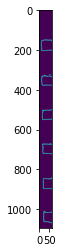

In [19]:
plt.imshow(BWImageCloseFake)

In [20]:
areaopenReal = bwareaopen(BWImageCloseReal, 15)
areaopenFake = bwareaopen(BWImageCloseFake, 15);

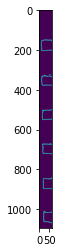

In [21]:
plt.imshow(areaopenFake)

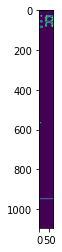

In [22]:
plt.imshow(areaopenReal)

In [23]:

bw = areaopenReal

labels = np.zeros(bw.shape)
countReal = cv2.connectedComponentsWithStats(bw, labels,8);

#Note that one label is the background
countReal[0]


8

In [24]:
bw2 = areaopenFake

labels2 = np.zeros(bw2.shape)
countFake = cv2.connectedComponentsWithStats(bw2, labels2,8);

#countFake that one label is the background
countFake[0]


8

In [25]:
def corr2(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

In [26]:
co=corr2 (a2tr, b2tr)

if (co.any()>=0.5):
    print ('correlevance of transparent gandhi > 0.5')
    if (countReal[0] == countFake[0] ):
        print ('currency is legitimate')
    else:
        print ('green strip is fake')
else:
    print ('correlevance of transparent gandhi < 0.5')
    print ('currency is fake')
    

correlevance of transparent gandhi > 0.5
currency is legitimate
